<a href="https://colab.research.google.com/github/PRANTIKCHAKRABORTY/EDA/blob/main/21BCE0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **THEORY DIGITAL ASSESMENT**

NAME - PRANTIK CHAKRABORTY

REGISTRATION NUMBER - 21BCE0003

SUBJECT - EXPLORATORY DATA ANALYTICS

GITHUB LINK - https://github.com/PRANTIKCHAKRABORTY/EDA

COLLAB LINK - https://colab.research.google.com/github/PRANTIKCHAKRABORTY/EDA/blob/main/21BCE0003.ipynb#scrollTo=yePvyzZZg7Q4

**IMPORT LIBRARY**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance as dist
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**LOADING THE DATASET**

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/covid-data.csv"
df = pd.read_csv(url)

In [3]:
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-null   

In [4]:
print(df)

     iso_code continent     location        date  total_cases  new_cases  \
0         AFG      Asia  Afghanistan  24/02/2020            5          5   
1         AFG      Asia  Afghanistan  25/02/2020            5          0   
2         AFG      Asia  Afghanistan  26/02/2020            5          0   
3         AFG      Asia  Afghanistan  27/02/2020            5          0   
4         AFG      Asia  Afghanistan  28/02/2020            5          0   
...       ...       ...          ...         ...          ...        ...   
5813      NGA    Africa      Nigeria  06/10/2022       265741        236   
5814      NGA    Africa      Nigeria  07/10/2022       265741          0   
5815      NGA    Africa      Nigeria  08/10/2022       265816         75   
5816      NGA    Africa      Nigeria  09/10/2022       265816          0   
5817      NGA    Africa      Nigeria  10/10/2022       265816          0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0      

**DATA CLEANING**

In [5]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64


In [6]:
# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


**UNIVARIATE ANALYSIS**

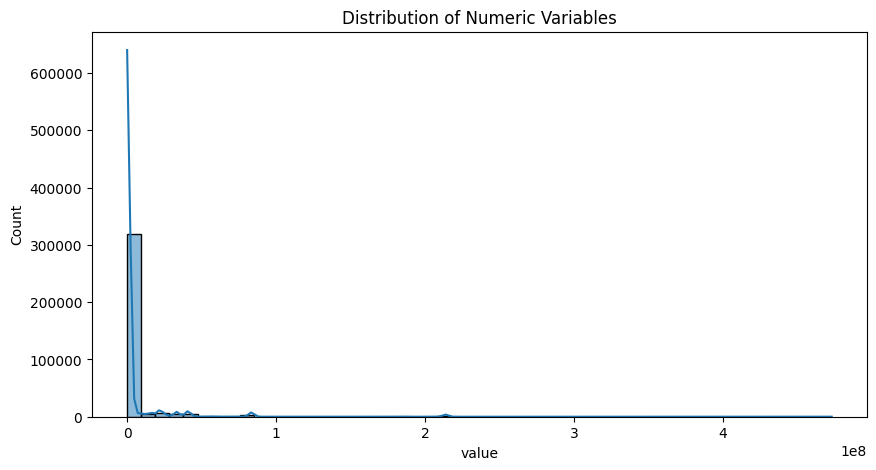

In [7]:
# Univariate Analysis
plt.figure(figsize=(10,5))
sns.histplot(df.select_dtypes(include=['number']).melt()['value'], bins=50, kde=True)
plt.title("Distribution of Numeric Variables")
plt.show()

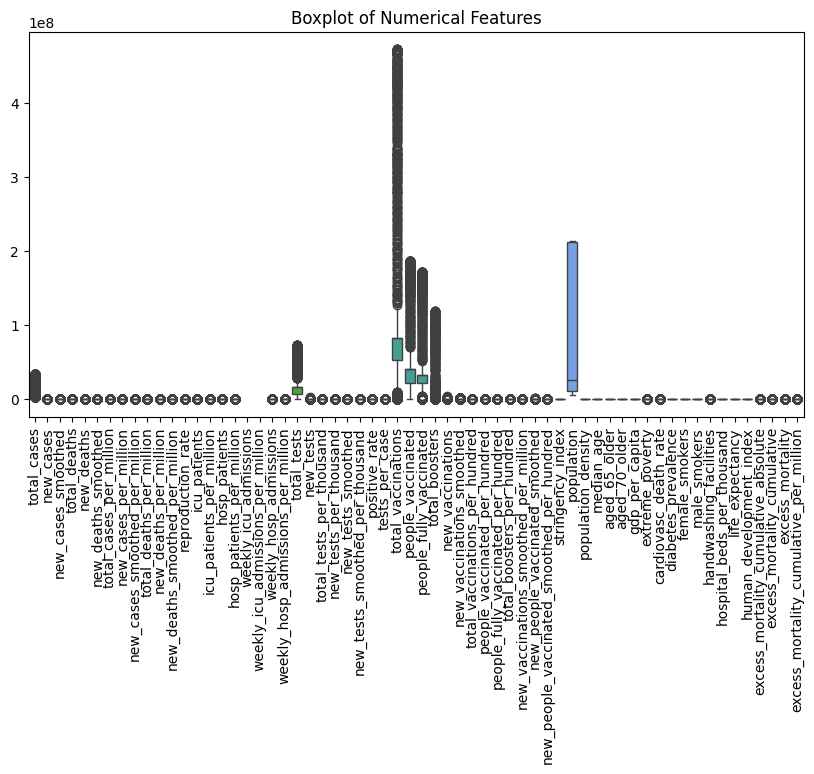

In [8]:
# Box plots for numerical features
plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

**BIVARIATE ANALYSIS**

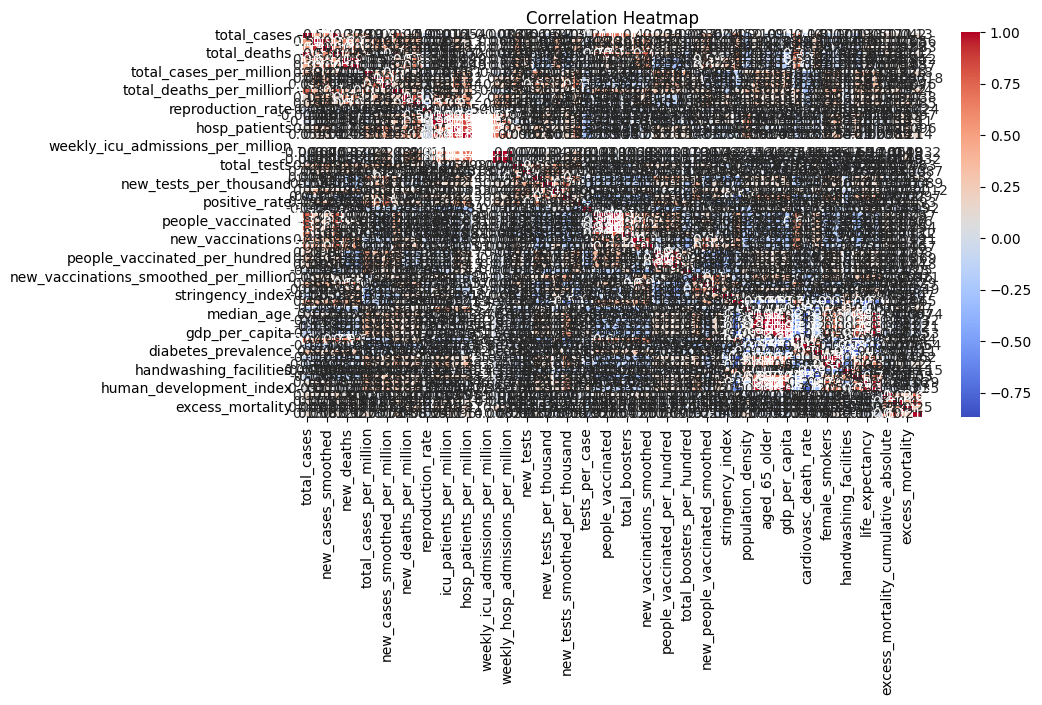

In [9]:
# Bivariate Analysis
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

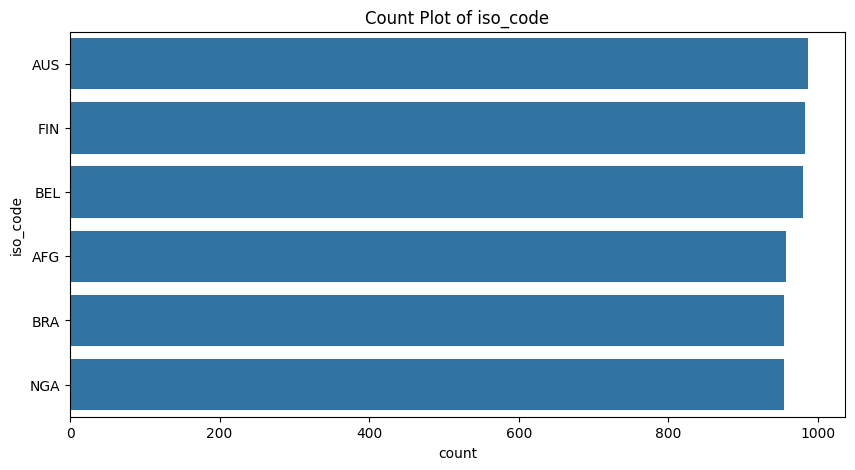

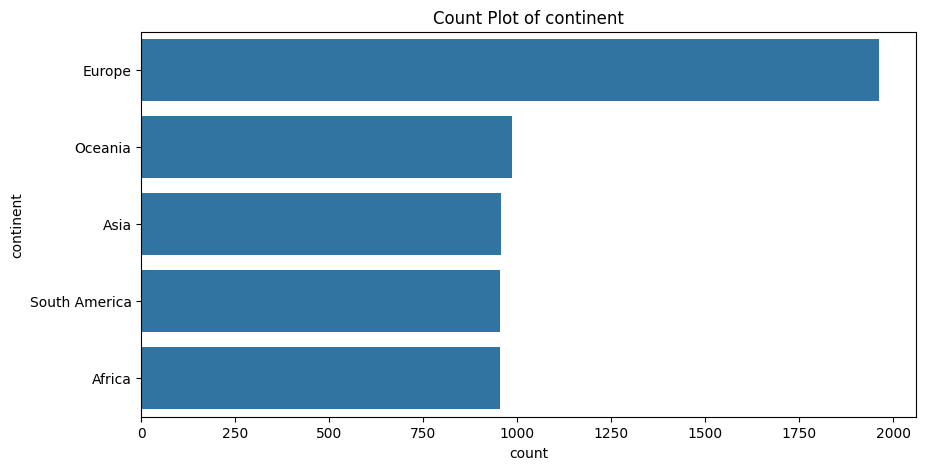

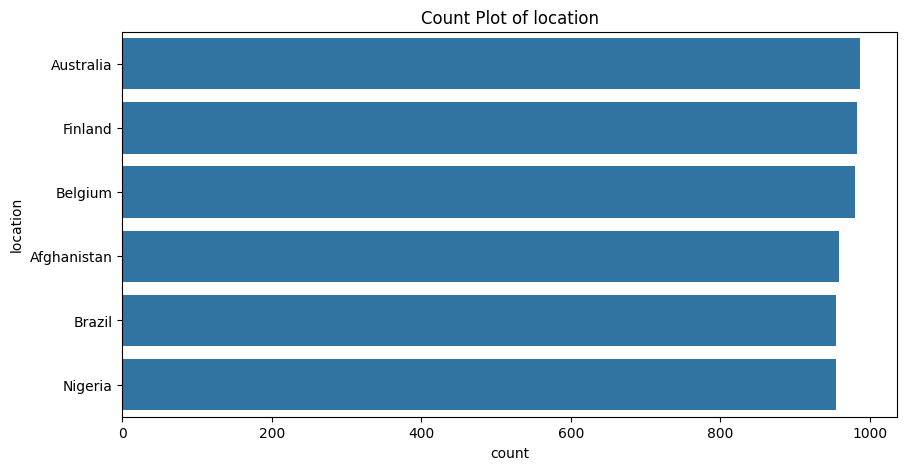

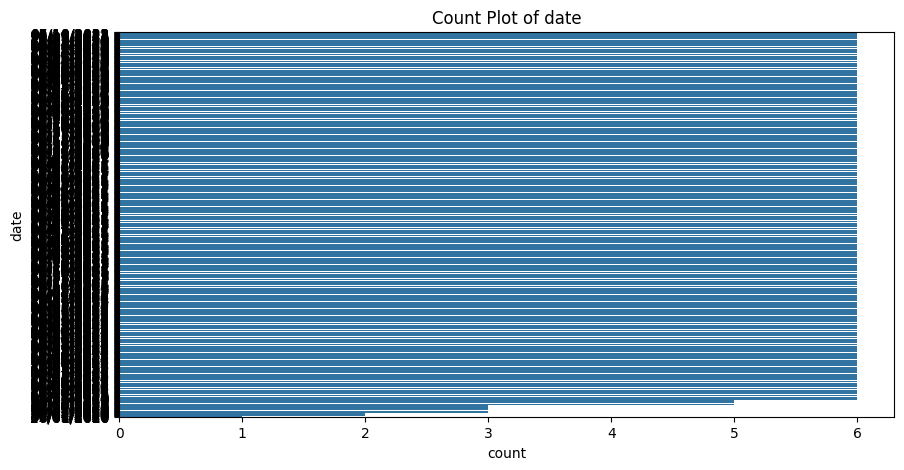

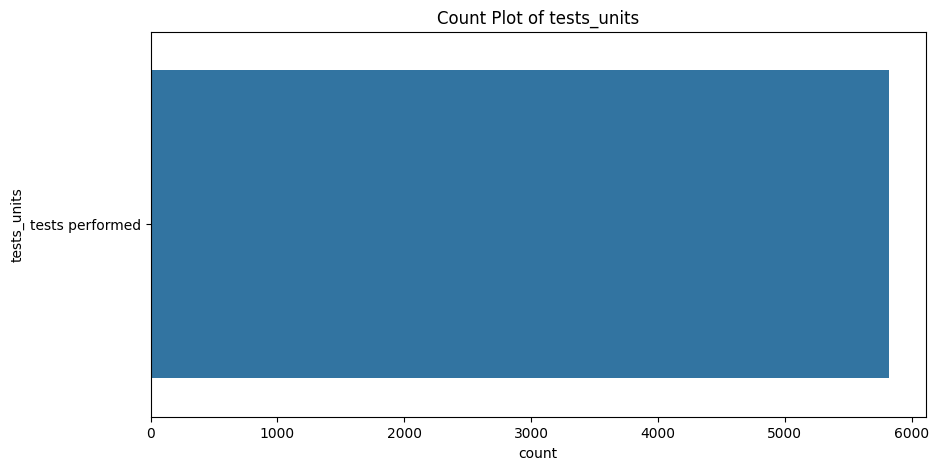

In [10]:
# Categorical variable analysis
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

In [13]:
# Final dataset information after cleaning
print("\nFinal Dataset Info:")
print(df.info())


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5818 non-null   float64
 7   total_deaths                                5818 non-null   float64
 8   new_deaths                                  5818 non-null   float64
 9   new_deaths_smoothed                         5818 non-null   floa

**Time Series Analysis**

In [14]:
# Check for the summary of the dataset
print(df.describe())

        total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  5.818000e+03    5818.000000         5818.000000    5818.000000   
mean   3.392399e+06    8814.365761         8828.573523   73497.078219   
std    7.640506e+06   21246.164422        19591.444649  177879.639390   
min    1.000000e+00       0.000000            0.000000       1.000000   
25%    4.097500e+04      24.000000           71.321750    1084.250000   
50%    1.763050e+05     261.000000          520.571500    3351.000000   
75%    1.317076e+06    3666.000000         6036.857000   25352.500000   
max    3.472419e+07  287149.000000       189227.000000  686877.000000   

        new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  5818.000000          5818.000000              5818.000000   
mean    133.369113           133.869586             58633.064842   
std     398.537146           377.512802             98559.689455   
min       0.000000             0.000000                 0.005000   
25

In [15]:
#  Frequency of the Dataset

date_diff = df.index.to_series().diff().dropna()
frequency = date_diff.mode().values[0]
print(f"Frequency of the dataset: {frequency}")



Frequency of the dataset: 1.0


In [16]:
# Display column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

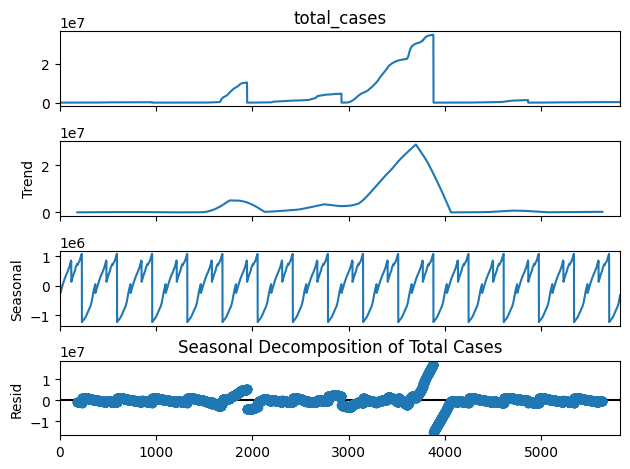

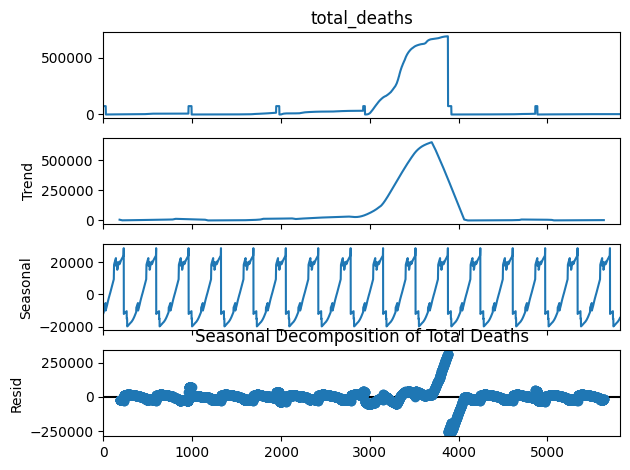

In [17]:
# Remove rows with missing values in the selected columns
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Seasonal Decomposition for Total Cases
result_cases = seasonal_decompose(df['total_cases'], model='additive', period=365)
result_cases.plot()
plt.title('Seasonal Decomposition of Total Cases')
plt.show()

# Seasonal Decomposition for Total Deaths
result_deaths = seasonal_decompose(df['total_deaths'], model='additive', period=365)
result_deaths.plot()
plt.title('Seasonal Decomposition of Total Deaths')
plt.show()

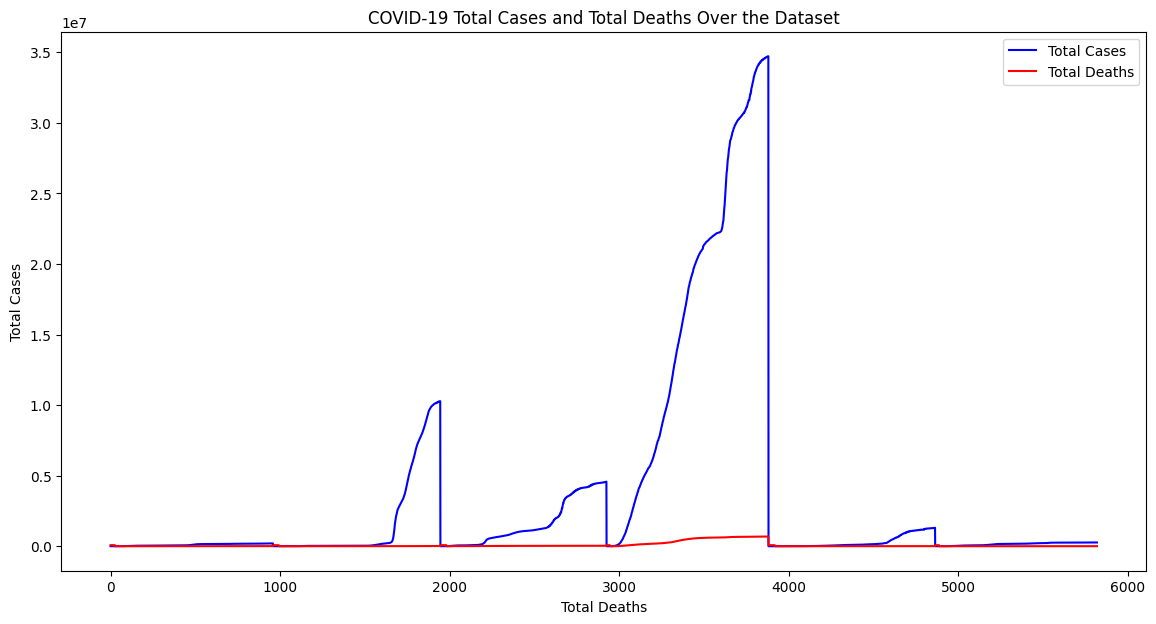

In [18]:
# Plot the Dataset
plt.figure(figsize=(14, 7))

# Plotting Total Cases
plt.plot(df['total_cases'].values, label='Total Cases', color='blue')

# Plotting Total Deaths
plt.plot(df['total_deaths'].values, label='Total Deaths', color='red')

# Adding labels and title
plt.xlabel('Total Deaths')
plt.ylabel('Total Cases')
plt.title('COVID-19 Total Cases and Total Deaths Over the Dataset')

# Adding legend
plt.legend()

# Show the plot
plt.show()


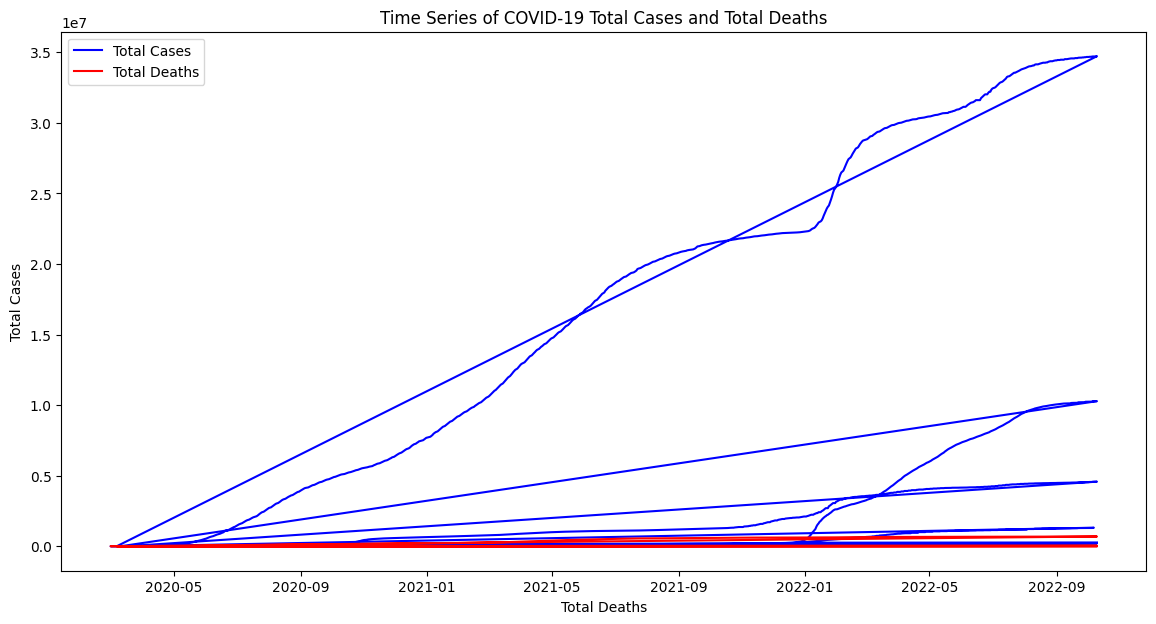

In [44]:
# Plotting the time series for Total Cases and Total Deaths
plt.figure(figsize=(14, 7))
plt.plot(df['total_cases'], label='Total Cases', color='blue')
plt.plot(df['total_deaths'], label='Total Deaths', color='red')

plt.xlabel('Total Deaths')
plt.ylabel('Total Cases')
plt.title('Time Series of COVID-19 Total Cases and Total Deaths')
plt.legend()

plt.show()

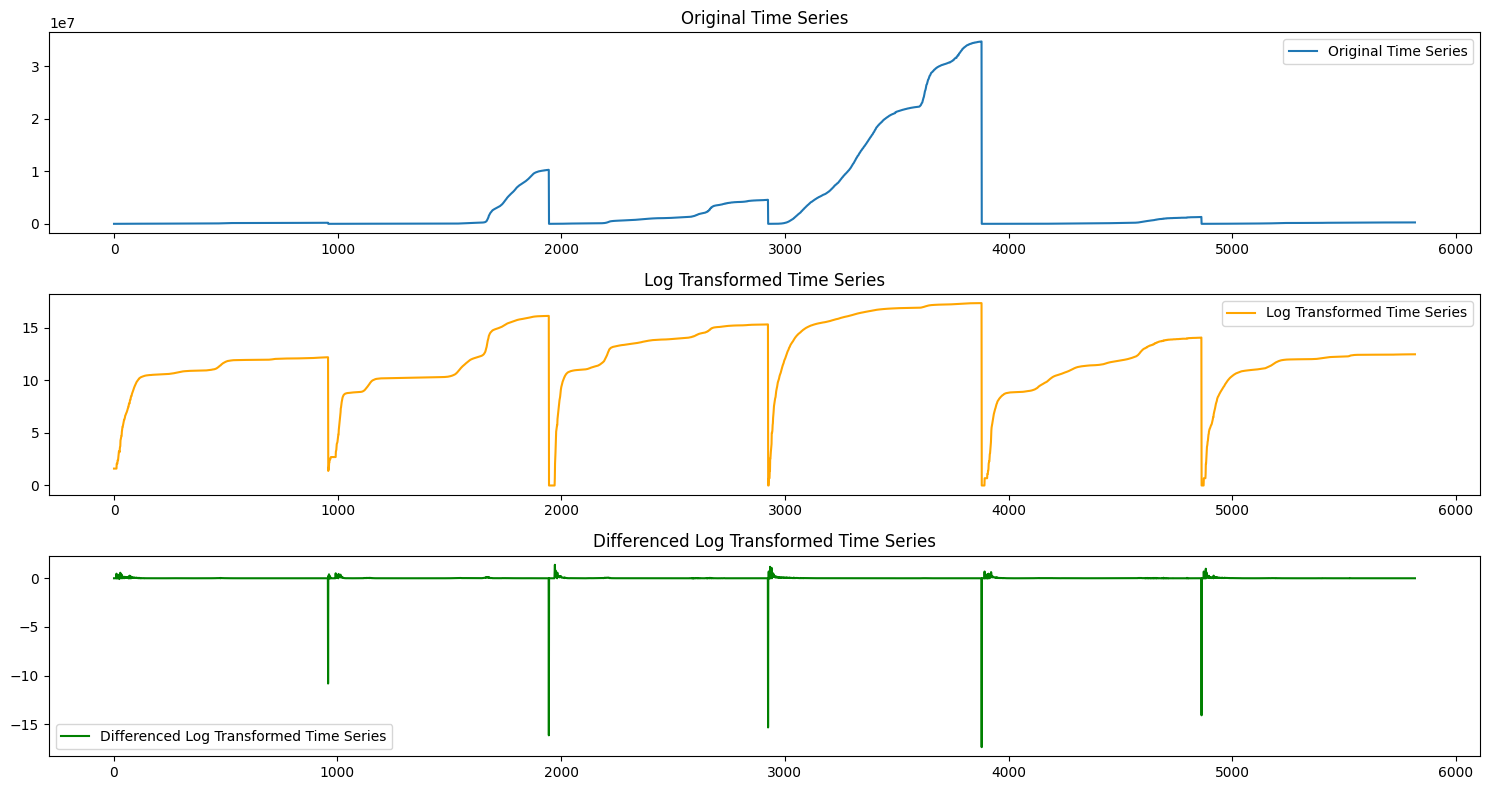

In [19]:
# Selecting total_cases for time series analysis
ts = df['total_cases'].dropna()

# a. Log transformation
log_ts = np.log(ts)

# b. Differencing the log-transformed data to achieve stationarity
diff_log_ts = log_ts.diff().dropna()

# Plotting the original, log-transformed, and differenced series
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(ts, label='Original Time Series')
plt.title('Original Time Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(log_ts, label='Log Transformed Time Series', color='orange')
plt.title('Log Transformed Time Series')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(diff_log_ts, label='Differenced Log Transformed Time Series', color='green')
plt.title('Differenced Log Transformed Time Series')
plt.legend()

plt.tight_layout()
plt.show()

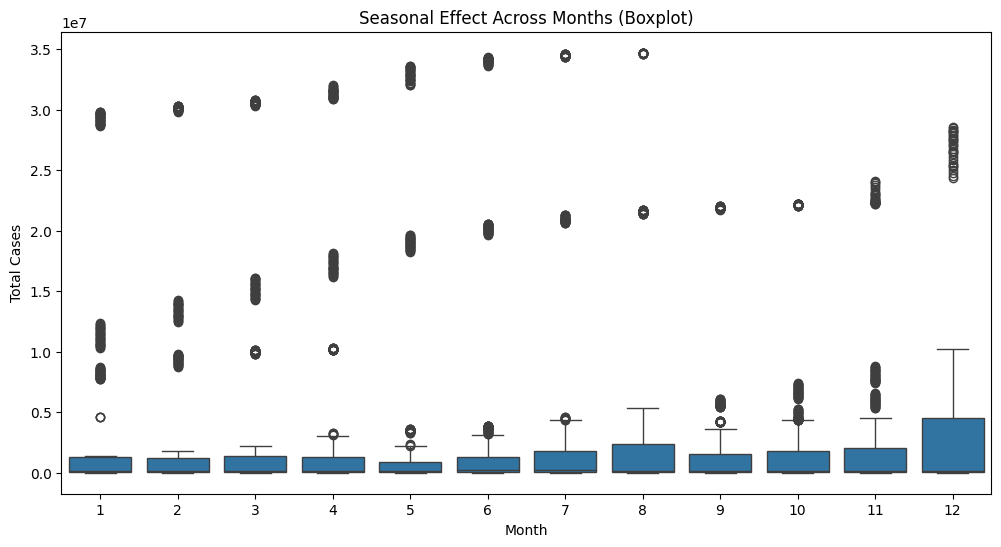

In [20]:
# Boxplot for seasonal effect across months
df['month'] = pd.date_range(start='1/1/2020', periods=len(df), freq='D').month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='total_cases', data=df)

plt.title('Seasonal Effect Across Months (Boxplot)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()

**Exploratory Data Analysis for Structured Data**

In [21]:
#1D ANALYSIS
numerical_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
central_tendency = {
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0],
    'Quantiles (25%, 50%, 75%)': df[numerical_cols].quantile([0.25, 0.5, 0.75]),
    'Deciles': df[numerical_cols].quantile(np.arange(0.1, 1.1, 0.1)),
    'Percentiles (10th, 50th, 90th)': df[numerical_cols].quantile([0.1, 0.5, 0.9])
}

print(central_tendency)

{'Mean': total_cases           3.392399e+06
new_cases             8.814366e+03
total_deaths          7.349708e+04
new_deaths            1.333691e+02
total_vaccinations    8.349671e+07
dtype: float64, 'Median': total_cases           1.763050e+05
new_cases             2.610000e+02
total_deaths          3.351000e+03
new_deaths            5.000000e+00
total_vaccinations    8.349671e+07
dtype: float64, 'Mode': total_cases           1.000000e+00
new_cases             0.000000e+00
total_deaths          7.349708e+04
new_deaths            0.000000e+00
total_vaccinations    8.349671e+07
Name: 0, dtype: float64, 'Quantiles (25%, 50%, 75%)':       total_cases  new_cases  total_deaths  new_deaths  total_vaccinations
0.25      40975.0       24.0       1084.25         0.0        5.388285e+07
0.50     176305.0      261.0       3351.00         5.0        8.349671e+07
0.75    1317075.5     3666.0      25352.50        46.0        8.349671e+07, 'Deciles':      total_cases  new_cases  total_deaths  new_dea

In [22]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
dispersion = {
    'Range': df[numerical_cols].max() - df[numerical_cols].min(),
    'Interquartile Range (IQR)': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25),
    'Interdecile Range': df[numerical_cols].quantile(0.9) - df[numerical_cols].quantile(0.1),
    'Mean Deviation': df[numerical_cols].apply(lambda x: np.mean(np.abs(x - np.mean(x)))),
    'Standard Deviation': df[numerical_cols].std(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurt()
}
dispersion_df = pd.DataFrame(dispersion)
print(dispersion_df)

                                                Range  \
total_cases                              3.472419e+07   
new_cases                                2.871490e+05   
new_cases_smoothed                       1.892270e+05   
total_deaths                             6.868760e+05   
new_deaths                               4.148000e+03   
...                                               ...   
excess_mortality_cumulative_absolute     8.151952e+05   
excess_mortality_cumulative              3.839000e+01   
excess_mortality                         1.259500e+02   
excess_mortality_cumulative_per_million  3.957206e+03   
month                                    1.100000e+01   

                                         Interquartile Range (IQR)  \
total_cases                                           1.276100e+06   
new_cases                                             3.642000e+03   
new_cases_smoothed                                    5.965535e+03   
total_deaths                       

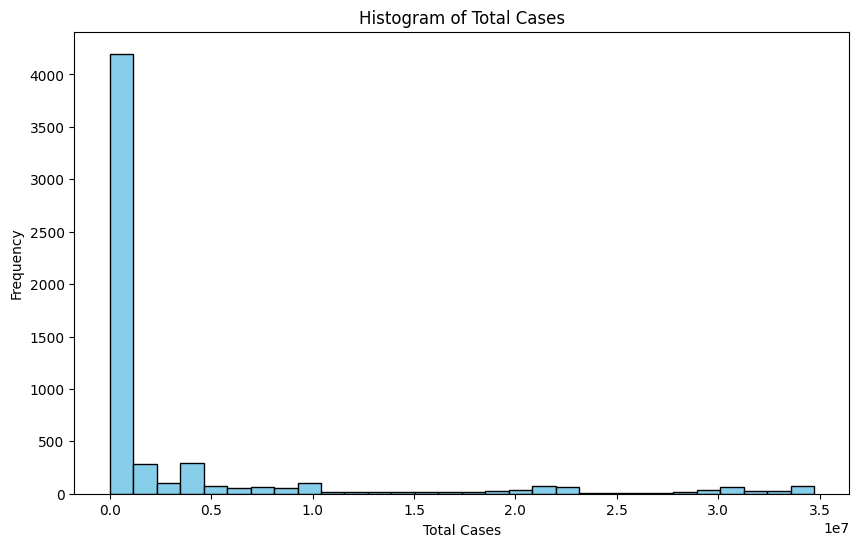

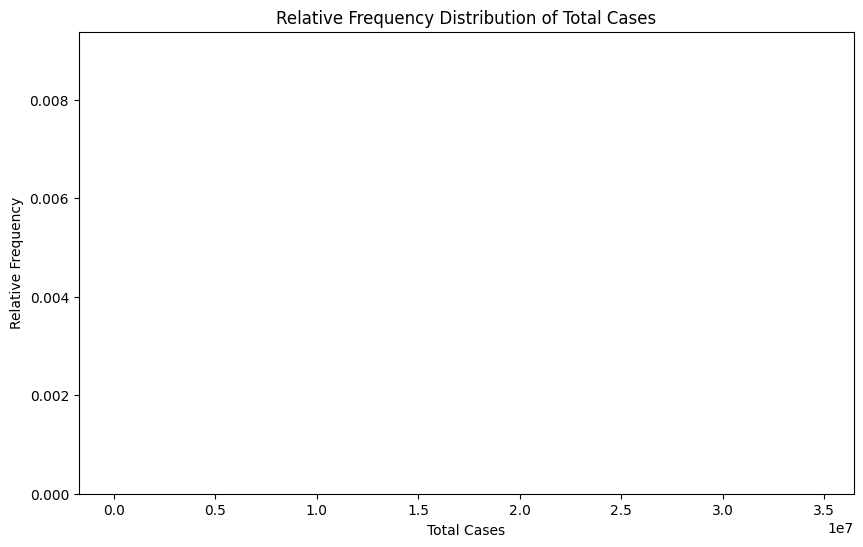

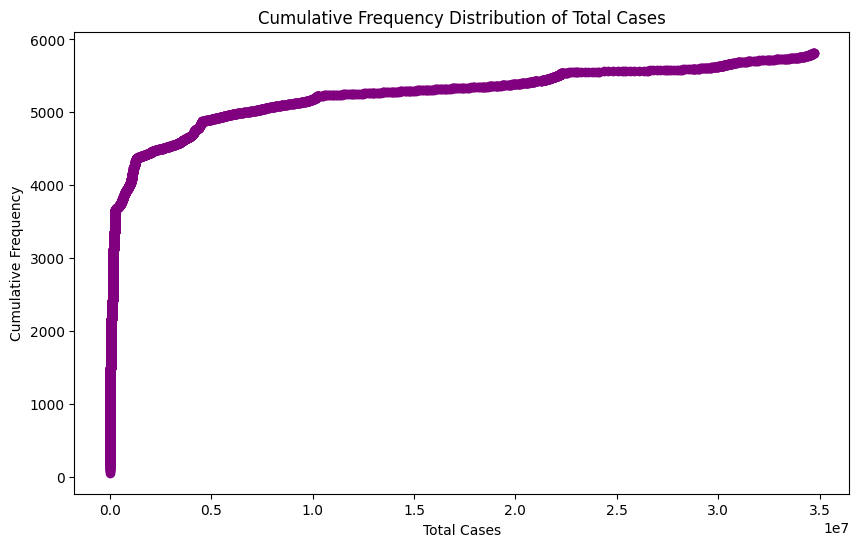

In [23]:
# Select numerical column for analysis
column = 'total_cases'

# Frequency Distribution
freq_dist = df[column].value_counts().sort_index()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

# Relative Frequency Distribution
rel_freq_dist = df[column].value_counts(normalize=True).sort_index()

# Cumulative Frequency Distribution
cum_freq_dist = df[column].value_counts().sort_index().cumsum()

# Plotting Relative Frequency Distribution
plt.figure(figsize=(10, 6))
plt.bar(rel_freq_dist.index, rel_freq_dist.values, color='lightgreen')
plt.title('Relative Frequency Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Relative Frequency')
plt.show()

# Plotting Cumulative Frequency Distribution
plt.figure(figsize=(10, 6))
plt.plot(cum_freq_dist.index, cum_freq_dist.values, marker='o', linestyle='-', color='purple')
plt.title('Cumulative Frequency Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Cumulative Frequency')
plt.show()

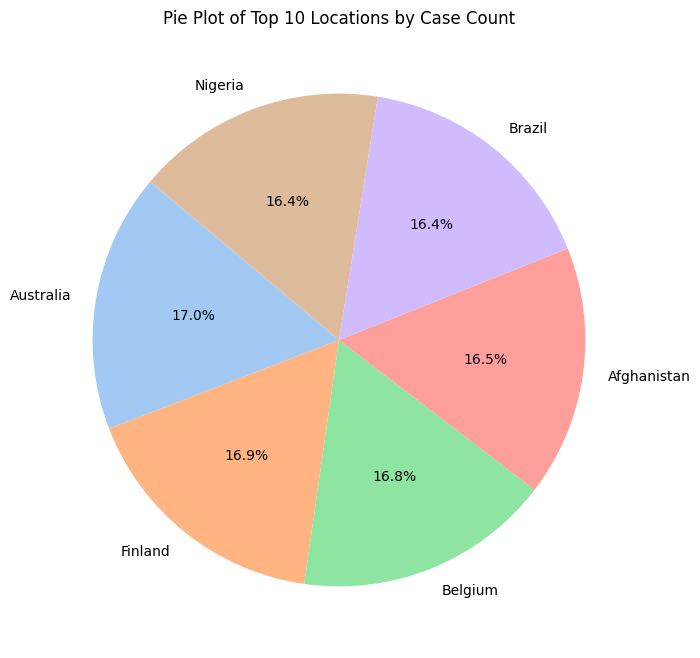

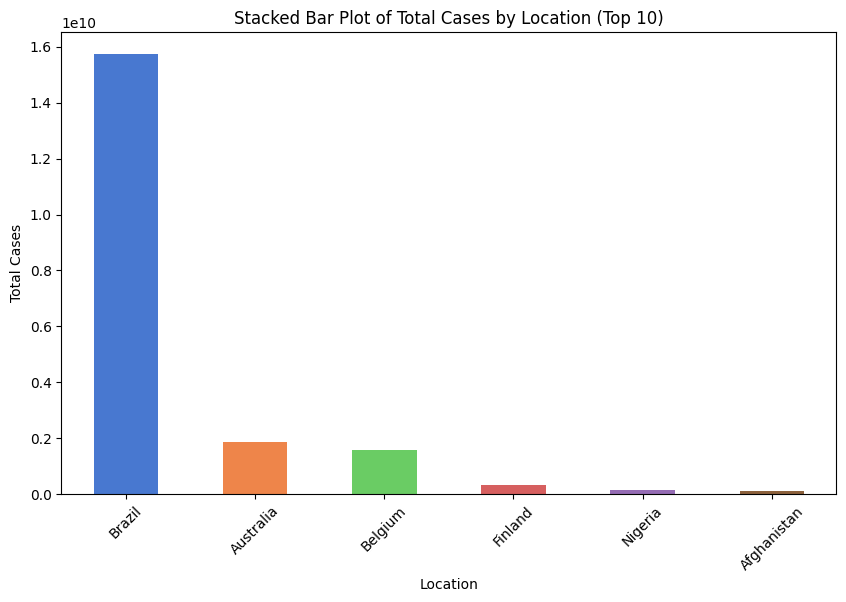

In [24]:
# Pie Plot for the 'location' categorical variable
plt.figure(figsize=(8, 8))
location_counts = df['location'].value_counts().head(10)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Pie Plot of Top 10 Locations by Case Count')
plt.show()

# Stacked Bar Plot for the same categorical variable
location_data = df.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(10)

# Plotting Stacked Bar Plot
plt.figure(figsize=(10, 6))
location_data.plot(kind='bar', stacked=True, color=sns.color_palette('muted'))
plt.title('Stacked Bar Plot of Total Cases by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


**Exploratory Data Analysis for Structured Data -2D ANALYSIS**

In [28]:
# Categorical-Categorical
contingency_cat_cat = pd.crosstab(df['location'], df['continent'])

# Numerical-Numerical
df['total_cases_group'] = pd.cut(df['total_cases'], bins=5)
contingency_num_num = pd.crosstab(df['total_cases_group'], df['total_deaths'])

# Categorical-Numerical
contingency_cat_num = df.groupby('continent')['total_cases'].mean()

# Display tables
print("Categorical-Categorical Table:\n", contingency_cat_cat)
print("\nNumerical-Numerical Table:\n", contingency_num_num)
print("\nCategorical-Numerical Table:\n", contingency_cat_num)


Categorical-Categorical Table:
 continent    Africa  Asia  Europe  Oceania  South America
location                                                 
Afghanistan       0   958       0        0              0
Australia         0     0       0      987              0
Belgium           0     0     980        0              0
Brazil            0     0       0        0            955
Finland           0     0     983        0              0
Nigeria         955     0       0        0              0

Numerical-Numerical Table:
 total_deaths              1.0       2.0       3.0       4.0       5.0       \
total_cases_group                                                            
(-34723.188, 6944838.6]         21        12        15        10         6   
(6944838.6, 13889676.2]          0         0         0         0         0   
(13889676.2, 20834513.8]         0         0         0         0         0   
(20834513.8, 27779351.4]         0         0         0         0         0   
(277793

In [29]:
three_way_table = pd.crosstab([df['location'], df['continent']], df['total_cases_group'])
print("\nThree-Way Contingency Table:\n", three_way_table)



Three-Way Contingency Table:
 total_cases_group          (-34723.188, 6944838.6]  (6944838.6, 13889676.2]  \
location    continent                                                         
Afghanistan Asia                               958                        0   
Australia   Oceania                            844                      143   
Belgium     Europe                             980                        0   
Brazil      South America                      292                      123   
Finland     Europe                             983                        0   
Nigeria     Africa                             955                        0   

total_cases_group          (13889676.2, 20834513.8]  (20834513.8, 27779351.4]  \
location    continent                                                           
Afghanistan Asia                                  0                         0   
Australia   Oceania                               0                         0   
Belgium     

In [27]:
# Row Profile
row_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=1), axis=0)

# Column Profile
col_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=0), axis=1)

# Relative Frequency
relative_freq = contingency_cat_cat / contingency_cat_cat.values.sum()

# Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_cat_cat)

# Display
print("\nRow Profile:\n", row_profile)
print("\nColumn Profile:\n", col_profile)
print("\nRelative Frequency:\n", relative_freq)
print("\nChi-Square Test Result:", chi2, "p-value:", p)



Row Profile:
 continent    Africa  Asia  Europe  Oceania  South America
location                                                 
Afghanistan     0.0   1.0     0.0      0.0            0.0
Australia       0.0   0.0     0.0      1.0            0.0
Belgium         0.0   0.0     1.0      0.0            0.0
Brazil          0.0   0.0     0.0      0.0            1.0
Finland         0.0   0.0     1.0      0.0            0.0
Nigeria         1.0   0.0     0.0      0.0            0.0

Column Profile:
 continent    Africa  Asia    Europe  Oceania  South America
location                                                   
Afghanistan     0.0   1.0  0.000000      0.0            0.0
Australia       0.0   0.0  0.000000      1.0            0.0
Belgium         0.0   0.0  0.499236      0.0            0.0
Brazil          0.0   0.0  0.000000      0.0            1.0
Finland         0.0   0.0  0.500764      0.0            0.0
Nigeria         1.0   0.0  0.000000      0.0            0.0

Relative Frequency:
 c

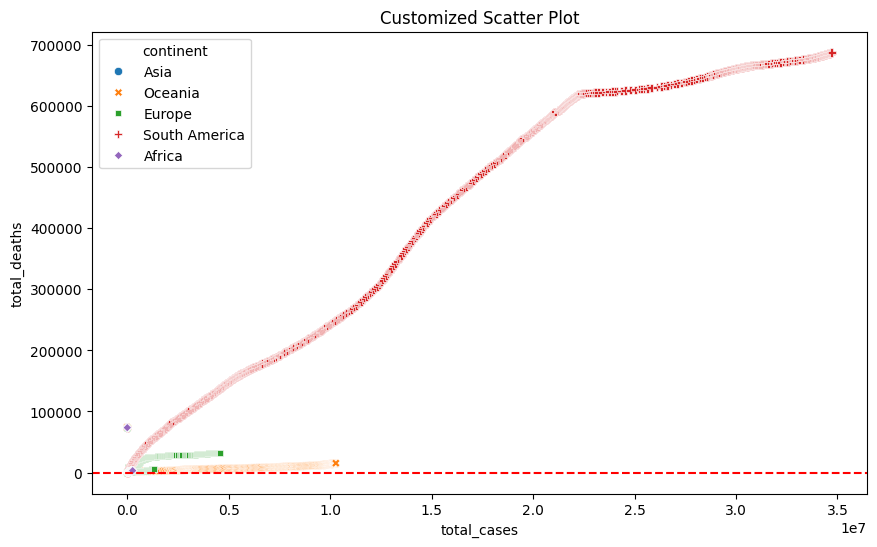

In [30]:
# Scatter plot for 'total_cases' vs 'total_deaths'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='total_deaths', hue='continent', style='continent', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Customized Scatter Plot')
plt.show()


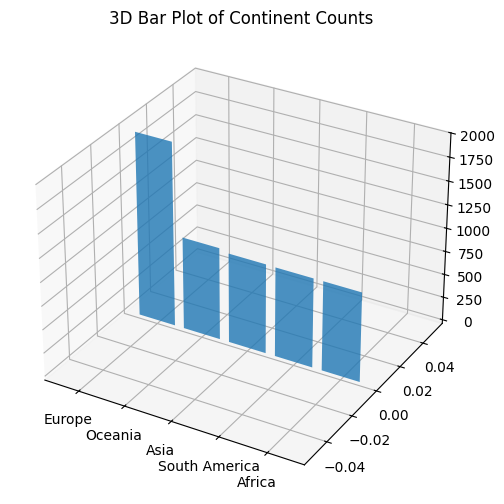

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Bar Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
x = df['continent'].value_counts().index
y = df['continent'].value_counts().values
z = [0] * len(x)

ax.bar(x, y, zs=z, zdir='y', alpha=0.8)
ax.set_title('3D Bar Plot of Continent Counts')
plt.show()


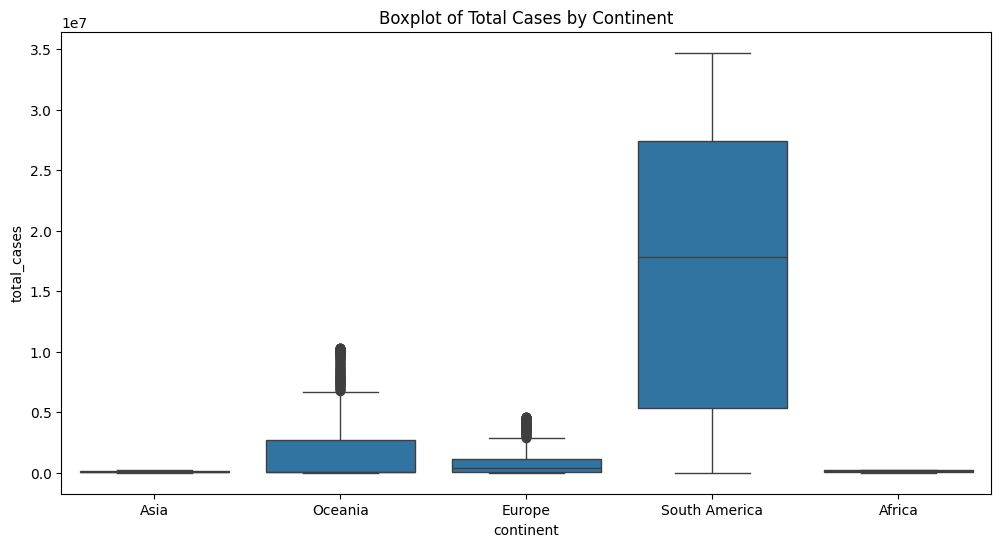

In [32]:
# Boxplot for 'total_cases' across 'continent'
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='total_cases', data=df)
plt.title('Boxplot of Total Cases by Continent')
plt.show()


**Hierachical Clustering**

In [39]:
# Selecting numerical columns for clustering
numerical_columns = data.select_dtypes(include=[np.number]).dropna().columns

# Computing the distance matrix using Euclidean method
distance_matrix = cdist(data[numerical_columns], data[numerical_columns], metric='euclidean')

# Displaying the distance matrix
distance_matrix_df = pd.DataFrame(distance_matrix, index=data.index, columns=data.index)
print(distance_matrix_df.head())

   0     1     2     3     4     5     6     7     8     9     ...  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

            5808           5809           5810           5811           5812  \
0  274588.727817  274588.727817  274588.727817  274660.259172  274660.259172   
1  274588.727817  274588.727817  274588.727817  274660.259172  274660.259172   
2  274588.727817  274588.727817  274588.727817  274660.259172  274660.259172   
3  274588.727817  274588.727817  274588.727817  274660.259172  274660.259172   
4  274588.727817  274588.727817  274588.727817  274660.259172  274660.259172   

            5813           5814           5815           5816           5817  
0  274888.394925  2

<ipython-input-43-78e721f5206f>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='ward')


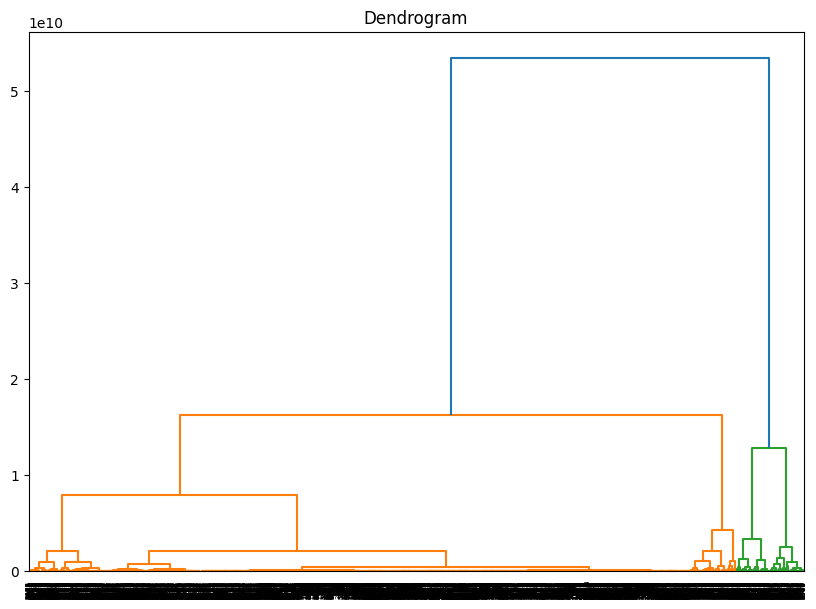

In [43]:
# Hierarchical clustering using 'ward' method
linked = sch.linkage(distance_matrix, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending')
plt.title('Dendrogram')
plt.show()

**Manhattan Distance Matrix**

In [47]:
#Compute the Manhattan Distance Matrix
manhattan_dist = pdist(data, metric='cityblock')
manhattan_dist_matrix = squareform(manhattan_dist)

# Display the Distance Matrix
print("Manhattan Distance Matrix:\n", manhattan_dist_matrix)

Manhattan Distance Matrix:
 [[     0.              0.              0.         ... 336153.07821923
  336153.07821923 336153.07821923]
 [     0.              0.              0.         ... 336153.07821923
  336153.07821923 336153.07821923]
 [     0.              0.              0.         ... 336153.07821923
  336153.07821923 336153.07821923]
 ...
 [336153.07821923 336153.07821923 336153.07821923 ...      0.
       0.              0.        ]
 [336153.07821923 336153.07821923 336153.07821923 ...      0.
       0.              0.        ]
 [336153.07821923 336153.07821923 336153.07821923 ...      0.
       0.              0.        ]]


<ipython-input-48-caed26c111c9>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_manhattan = sch.linkage(distance_matrix_manhattan, method='ward')


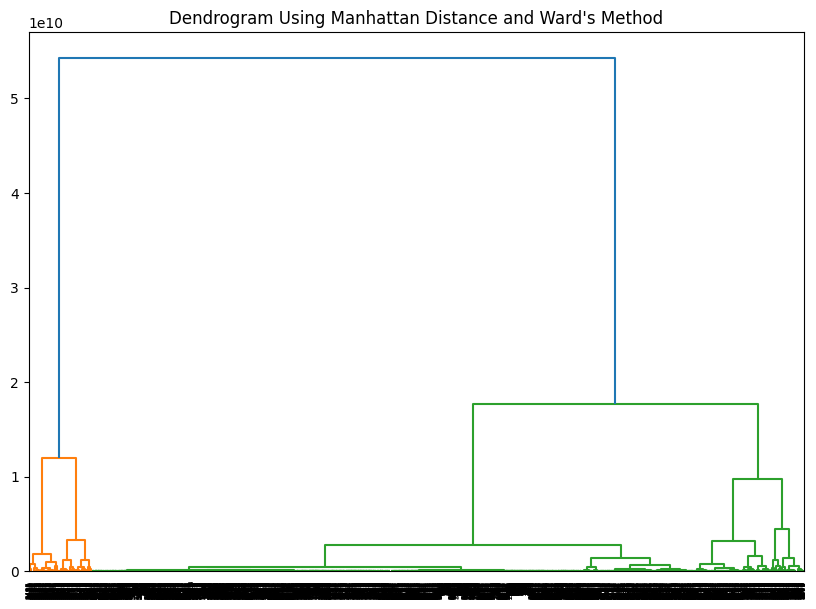

In [48]:
# Hierarchical clustering using 'ward' method on Manhattan distance matrix
linked_manhattan = sch.linkage(distance_matrix_manhattan, method='ward')

# Visualizing dendrogram without location labels
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_manhattan, orientation='top', no_plot=False)
plt.title('Dendrogram Using Manhattan Distance and Ward\'s Method')
plt.show()

**Distance Matrix**

In [50]:
# Selecting numerical columns for clustering
numerical_columns = data.select_dtypes(include=[np.number]).dropna().columns

# Computing the distance matrix using the maximum method
distance_matrix_max = cdist(data[numerical_columns], data[numerical_columns], metric='chebyshev')

# Displaying the maximum distance matrix
distance_matrix_max_df = pd.DataFrame(distance_matrix_max, index=data.index, columns=data.index)
print(distance_matrix_max_df.head())

   0     1     2     3     4     5     6     7     8     9     ...      5808  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  265426.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  265426.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  265426.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  265426.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  265426.0   

       5809      5810      5811      5812      5813      5814      5815  \
0  265426.0  265426.0  265500.0  265500.0  265736.0  265736.0  265811.0   
1  265426.0  265426.0  265500.0  265500.0  265736.0  265736.0  265811.0   
2  265426.0  265426.0  265500.0  265500.0  265736.0  265736.0  265811.0   
3  265426.0  265426.0  265500.0  265500.0  265736.0  265736.0  265811.0   
4  265426.0  265426.0  265500.0  265500.0  265736.0  265736.0  265811.0   

       5816      5817  
0  265811.0  265811.0  
1  265811.0  265811.

<ipython-input-51-6b0277a65224>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_max = sch.linkage(distance_matrix_max, method='ward')


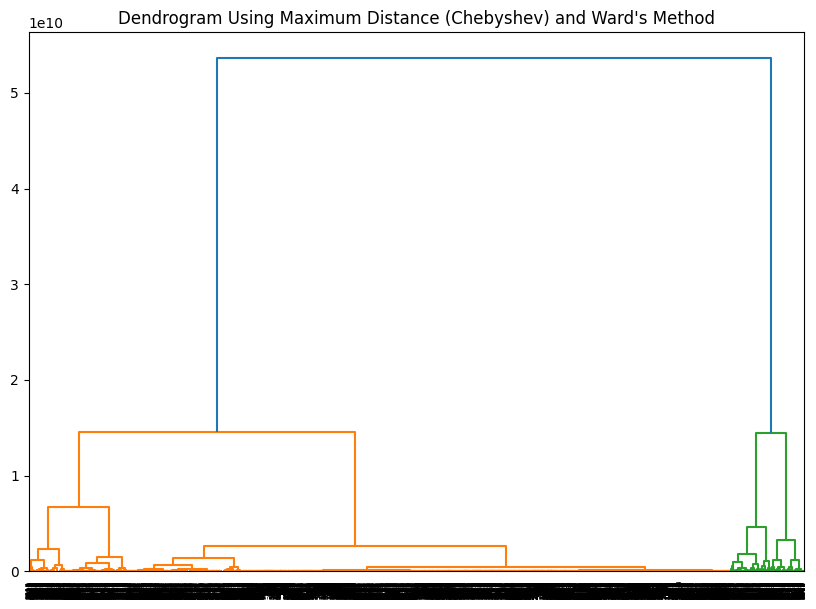

In [51]:
# Hierarchical clustering using 'ward' method on maximum distance matrix
linked_max = sch.linkage(distance_matrix_max, method='ward')

# Visualizing dendrogram using the basic plot function
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_max, orientation='top', labels=data.index, distance_sort='descending')
plt.title('Dendrogram Using Maximum Distance (Chebyshev) and Ward\'s Method')
plt.show()

**Canberra Distance**

In [52]:
# Select only numeric columns for clustering
numeric_data = data.select_dtypes(include=[np.number])

# Compute the distance matrix using Canberra distance
distance_matrix = dist.pdist(numeric_data, metric='canberra')
distance_matrix = dist.squareform(distance_matrix)

# Display the distance matrix
print("Canberra Distance Matrix:")
print(distance_matrix)


Canberra Distance Matrix:
[[0.         0.         0.         ... 1.91764237 1.91764237 1.91764237]
 [0.         0.         0.         ... 1.91764237 1.91764237 1.91764237]
 [0.         0.         0.         ... 1.91764237 1.91764237 1.91764237]
 ...
 [1.91764237 1.91764237 1.91764237 ... 0.         0.         0.        ]
 [1.91764237 1.91764237 1.91764237 ... 0.         0.         0.        ]
 [1.91764237 1.91764237 1.91764237 ... 0.         0.         0.        ]]


<ipython-input-53-d2ac58aaf9a6>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='ward')


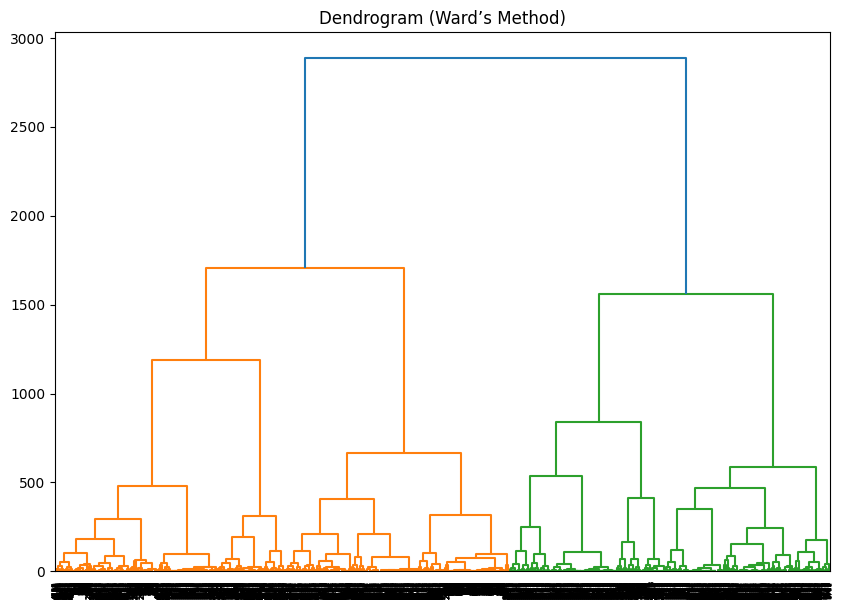

In [53]:
# Hierarchical clustering using Ward's method (method='ward')
linked = sch.linkage(distance_matrix, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending')
plt.title('Dendrogram (Ward’s Method)')
plt.show()

**Binary Distance**

In [54]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

binary_data = (numeric_data > 0).astype(int)

# Compute the distance matrix using binary distance
distance_matrix = dist.pdist(binary_data, metric='jaccard')
distance_matrix = dist.squareform(distance_matrix)

# Display the distance matrix
print("Binary Distance (Jaccard) Matrix:")
print(distance_matrix)

Binary Distance (Jaccard) Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Hierarchical clustering**

total_cases     0
total_deaths    0
dtype: int64


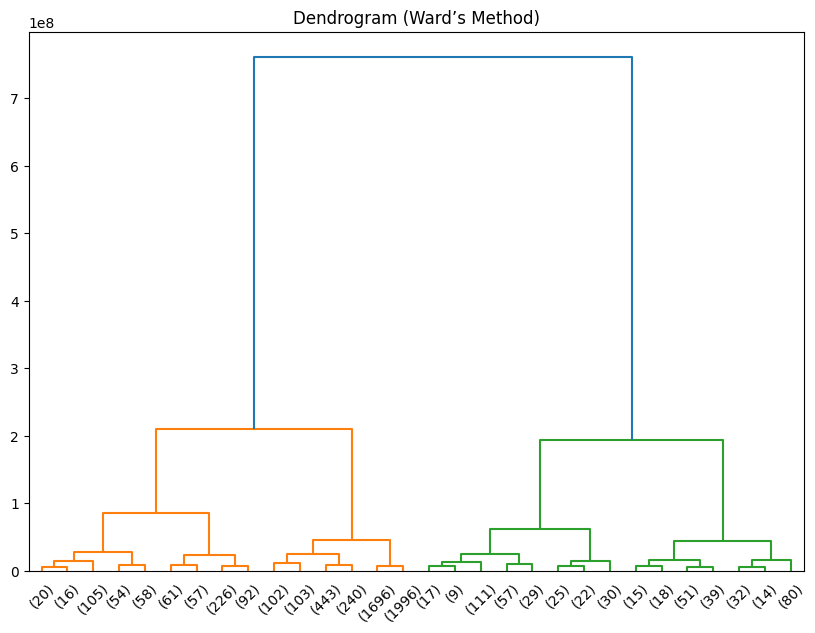

In [55]:
import sys
sys.setrecursionlimit(10000)
data_subset = data.sample(n=500, random_state=42)
print(data.isnull().sum())
data = data.dropna()
from scipy.cluster import hierarchy


# Hierarchical clustering
linked = hierarchy.linkage(data, method='ward')

# Truncate dendrogram
plt.figure(figsize=(10, 7))
hierarchy.dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', truncate_mode='lastp', p=30)
plt.title('Dendrogram (Ward’s Method)')
plt.show()


**Minkowski Distance**

In [56]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the distance matrix using Minkowski distance
distance_matrix = dist.pdist(numeric_data, metric='minkowski', p=2)
distance_matrix = dist.squareform(distance_matrix)

# Display the distance matrix
print("Minkowski Distance (p=2) Matrix:")
print(distance_matrix)

Minkowski Distance (p=2) Matrix:
[[     0.              0.              0.         ... 274960.89847322
  274960.89847322 274960.89847322]
 [     0.              0.              0.         ... 274960.89847322
  274960.89847322 274960.89847322]
 [     0.              0.              0.         ... 274960.89847322
  274960.89847322 274960.89847322]
 ...
 [274960.89847322 274960.89847322 274960.89847322 ...      0.
       0.              0.        ]
 [274960.89847322 274960.89847322 274960.89847322 ...      0.
       0.              0.        ]
 [274960.89847322 274960.89847322 274960.89847322 ...      0.
       0.              0.        ]]


<ipython-input-57-d2ac58aaf9a6>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='ward')


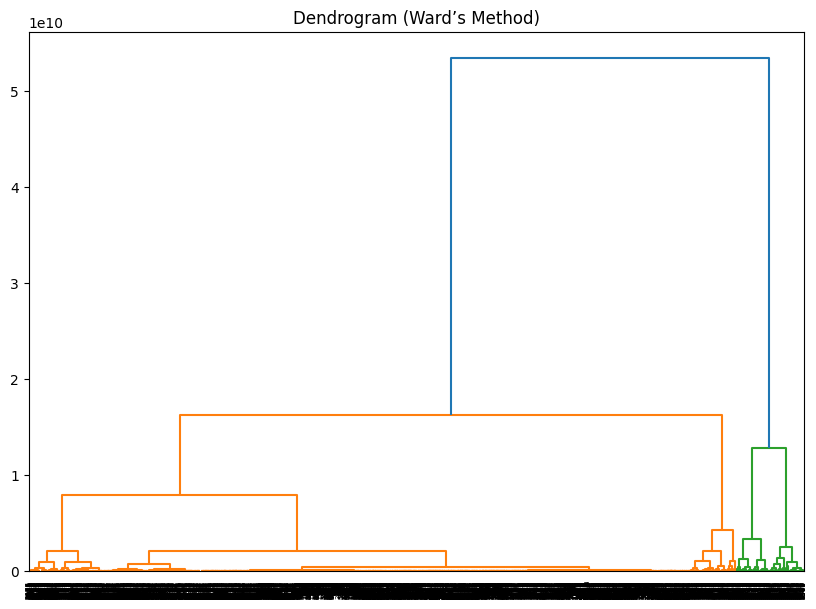

In [57]:
# Hierarchical clustering using Ward's method (method='ward')
linked = sch.linkage(distance_matrix, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending')
plt.title('Dendrogram (Ward’s Method)')
plt.show()

**K-MEANS CLUSTERING**

In [58]:
# 1. Selecting numerical columns for clustering
numeric_data = data.select_dtypes(include=[np.number]).dropna()

In [59]:
# 2. Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [60]:
# 3. Apply K-means with 5 Clusters
np.random.seed(123)
kmeans_result = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=123)
kmeans_result.fit(data_scaled)

KMeans(n_clusters=5, n_init=10, random_state=123)

In [61]:
# 4. Add K-means Cluster Labels to the Dataset
data['KMeans_Cluster'] = kmeans_result.labels_


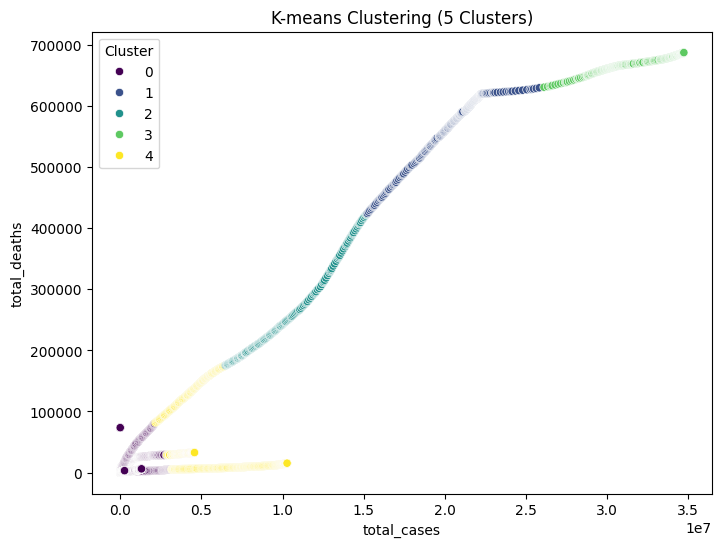

In [64]:
# 5. Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-means Clustering (5 Clusters)')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend(title='Cluster')
plt.show()

**DBSCAN CLUSTERING**

In [65]:
# 1. Selecting numerical columns for clustering
numeric_data = data.select_dtypes(include=[np.number]).dropna()

In [66]:
# 2. Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [67]:
# 3. Apply DBSCAN with epsilon = 0.5 and minPts = 5
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)


In [68]:
# 4. Add DBSCAN Cluster Labels to the Dataset
data['DBSCAN_Cluster'] = dbscan_labels

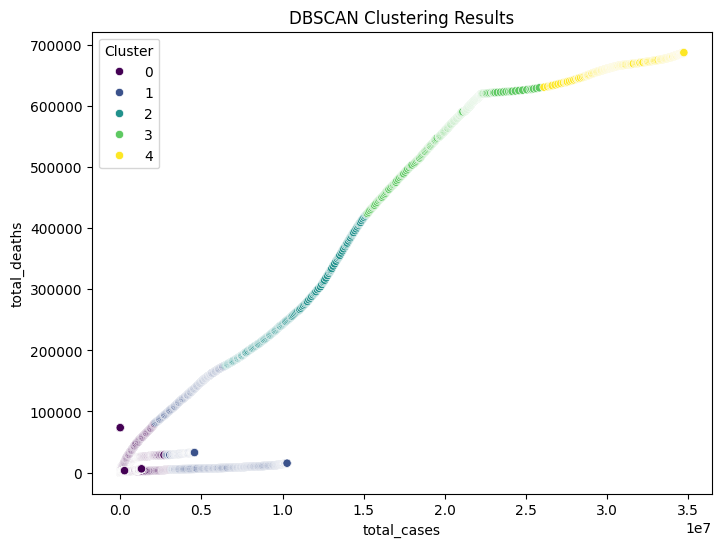

In [69]:
# 5. Visualizing the DBSCAN Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel(data.columns[0])  # First feature
plt.ylabel(data.columns[1])  # Second feature
plt.legend(title='Cluster')
plt.show()

**Principle Component Analysis**

In [70]:
# Selecting numerical columns for PCA
numeric_data = data.select_dtypes(include=[np.number]).dropna()

In [71]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [72]:
# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

In [73]:
# Print PCA Results (Eigenvalues and Component Loadings)
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_variance)

Eigenvalues: [3.29853364 0.66825156 0.02317256 0.01072987]
Explained Variance Ratio: [0.82449167 0.16703418 0.00579214 0.00268201]


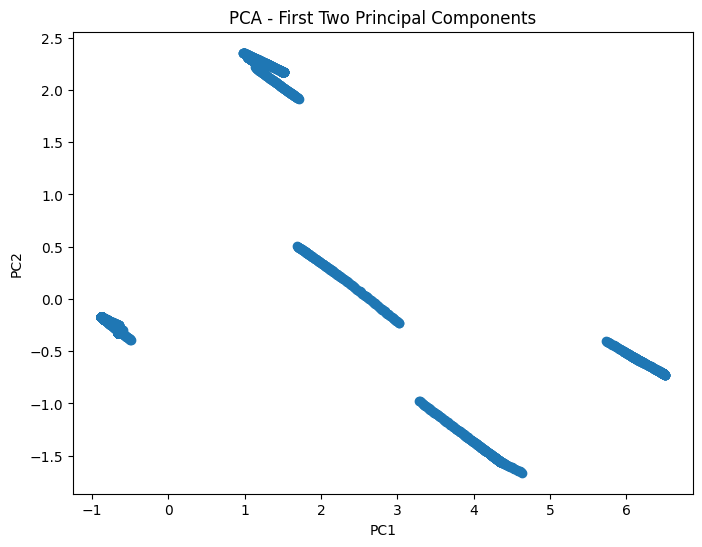

In [74]:
# Visualize PCA Components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

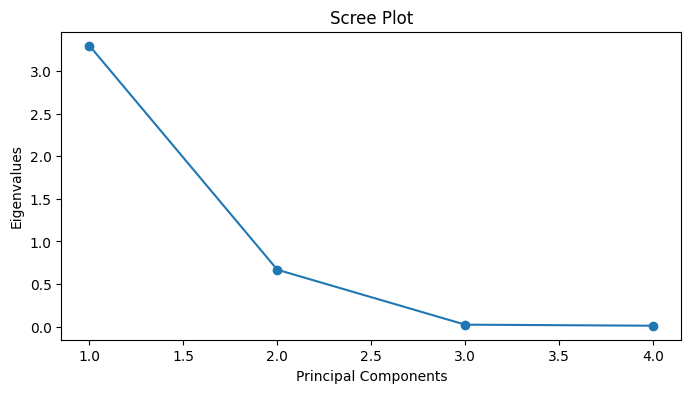

In [75]:
# Create a Scree Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

**Simple Linear Regression**

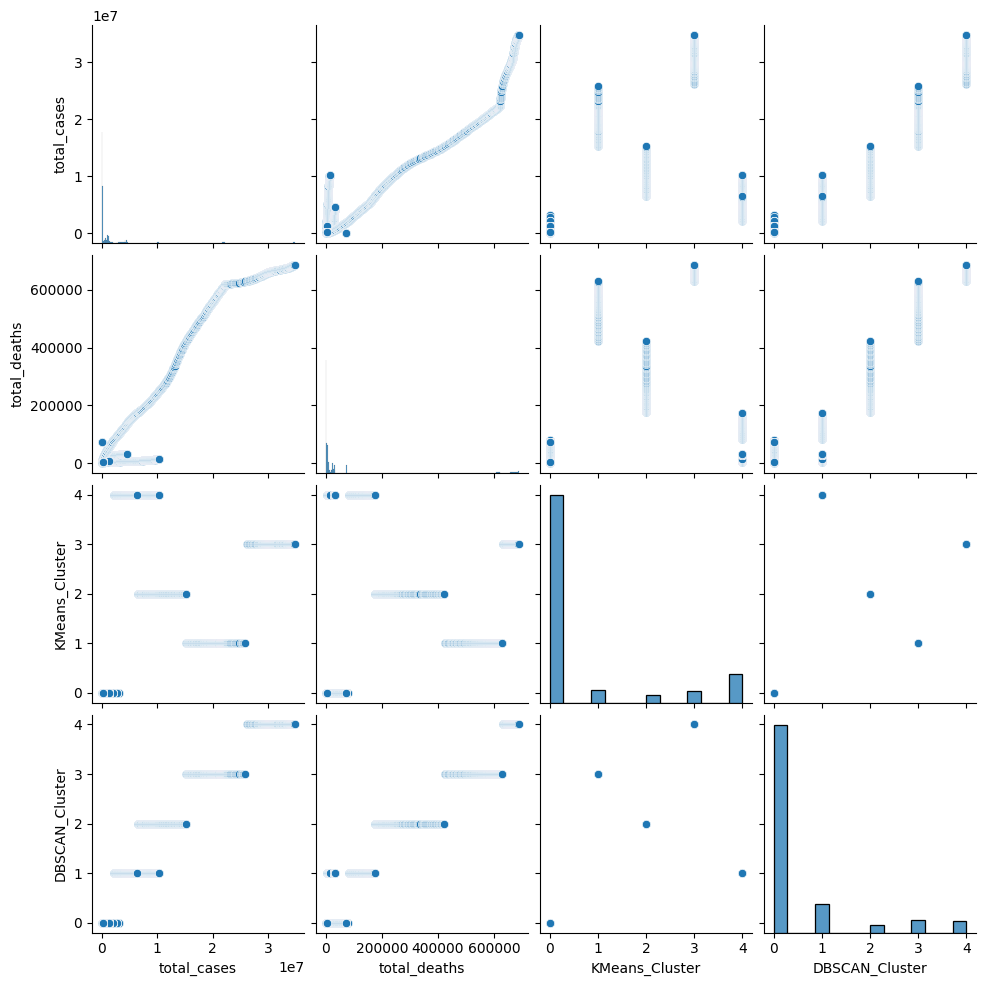

In [76]:
# 1. Pair Plot to Identify Relationships
sns.pairplot(data[['total_cases', 'total_deaths', 'KMeans_Cluster', 'DBSCAN_Cluster']])
plt.show()

In [77]:
# 2. Splitting Dataset into Training and Test Sets
X = data[['total_cases']]
y = data['total_deaths']
X = X.dropna()
y = y.dropna()
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)

In [78]:
# 3. Simple Linear Regression
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)


LinearRegression()

In [79]:
# 4. Check Residuals Error
y_pred_train = reg1.predict(X_train)
residuals = y_train - y_pred_train
print("Residuals Summary:")
print(residuals.describe())



Residuals Summary:
count    3.878000e+03
mean    -2.347519e-11
std      4.749799e+04
min     -2.128133e+05
25%      2.846592e+02
50%      2.862757e+03
75%      6.463021e+03
max      1.217125e+05
Name: total_deaths, dtype: float64


In [80]:
# 5. Predicting Test Set Results
y_pred = reg1.predict(X_test)



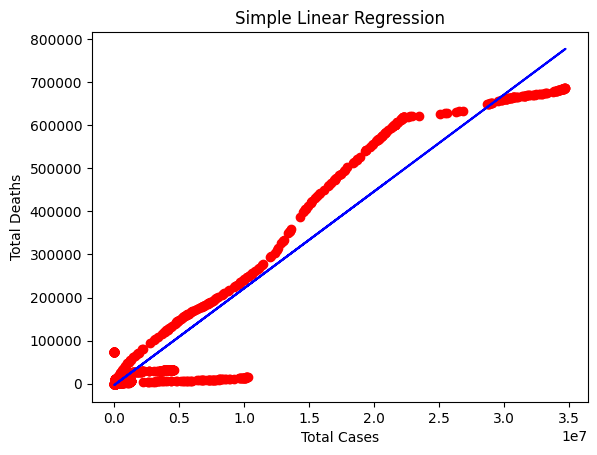

In [81]:
# 6. Visualize Test Set Results with Data Points and Regressor Line
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title("Simple Linear Regression")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

In [82]:
# 7. Multiple Linear Regression Using Clustering Labels
X_multi = data[['total_cases', 'KMeans_Cluster', 'DBSCAN_Cluster']].dropna()
y_multi = data['total_deaths'].dropna()

# Train-Test Split for Multiple Regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=123)

# Model Fitting
import statsmodels.api as sm
reg2 = sm.OLS(y_train_multi, sm.add_constant(X_train_multi)).fit()



In [83]:
# 8. Summarize reg2 and Check Residual Error
print(reg2.summary())



                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 5.234e+04
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                -45135.
No. Observations:                3878   AIC:                         9.028e+04
Df Residuals:                    3874   BIC:                         9.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7193.0749    499.763     14.

In [84]:
# 9. Compare Predicted and Residual Values
predicted_values = reg2.fittedvalues
residual_values = reg2.resid
comparison_df = pd.DataFrame({'Predicted': predicted_values, 'Residuals': residual_values})



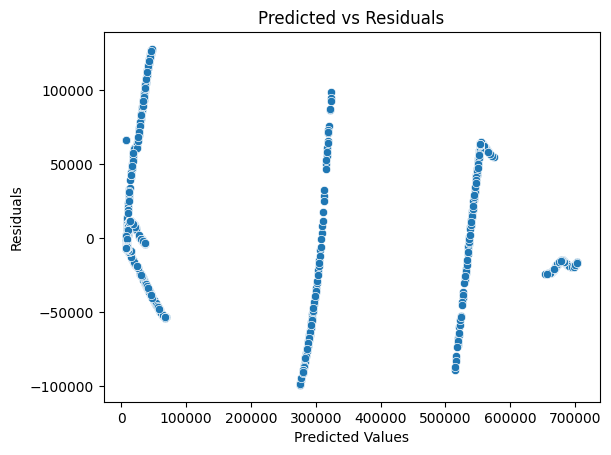

In [85]:
# 10. Visualize Predicted and Residual Errors
sns.scatterplot(x='Predicted', y='Residuals', data=comparison_df)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()



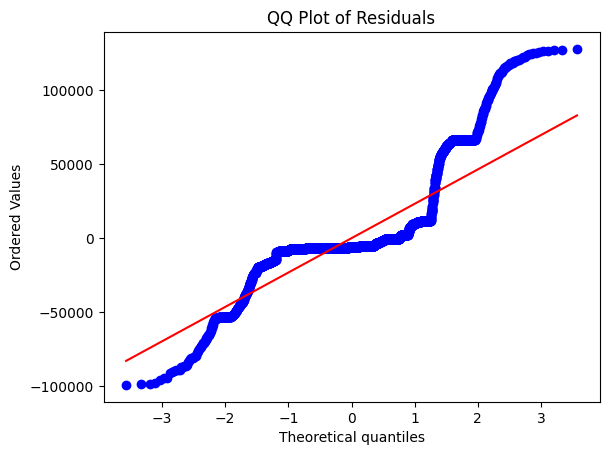

In [86]:
# 11. QQ Plot for Residuals
import scipy.stats as stats
stats.probplot(residual_values, plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

**PERFORMANCE MATRIX**

In [87]:
# Selecting numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).dropna().columns

# Computing the performance matrix (correlation matrix)
performance_matrix = data[numerical_columns].corr()


In [88]:
# Displaying the performance matrix
print(performance_matrix.head())

                total_cases  total_deaths  KMeans_Cluster  DBSCAN_Cluster
total_cases        1.000000      0.964517        0.551053        0.978137
total_deaths       0.964517      1.000000        0.408695        0.956881
KMeans_Cluster     0.551053      0.408695        1.000000        0.623269
DBSCAN_Cluster     0.978137      0.956881        0.623269        1.000000
